<a href="https://colab.research.google.com/github/AlphardXyl/Algorithms-of-Foundation-Models/blob/main/cnn1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [210]:
#!pip install tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data
(train_X, train_y), (test_X, test_y) = keras.datasets.fashion_mnist.load_data()

In [211]:
train_X = train_X/255
test_X = test_X/255

X1 = train_X[100:200]
X1.shape
T1 = train_y[100:200]
T1.shape

(100,)

In [6]:
# This cell should be run inplace of the cell directly above
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0

train_y[1] = 0 



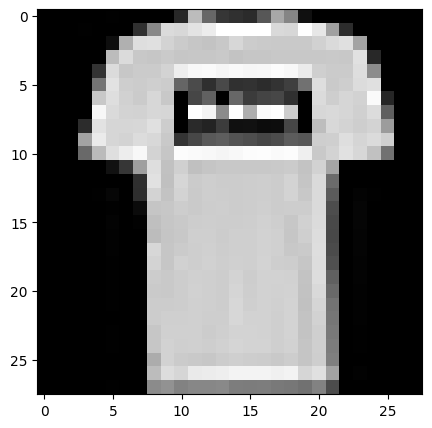

In [7]:
print(f"{train_y[1] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[1], cmap="gray")
plt.show()

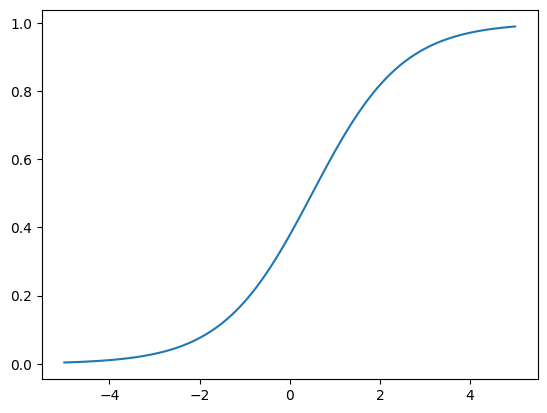

In [8]:
#plot of activation function

def sigma(x):
    if type(x)==float:
        y = 1/(1+np.exp(0.5-x))
        return y
    elif type(x)==np.float64:
        y = 1/(1+np.exp(0.5-x))
        return y
    elif np.ndim(x)>=2:
        y = np.zeros(x.shape)
        [n,m] = x.shape
        for i in range(0,n):
          for j in range(0,m):
            y[i,j] = 1/(1+np.exp(0.5-x[i,j]))
        return y
    else:
        y = np.zeros(len(x))
        y[:] = 1/(1+np.exp(0.5-x[:]))
        return y
def sigmaprime(x):
    if type(x)==float:
        y = sigma(x) * (1-sigma(x))
        return y
    elif type(x)==np.float64:
        y = sigma(x) * (1-sigma(x))
        return y
    elif np.ndim(x)>=2:
        y = np.zeros(x.shape)
        [n,m] = x.shape
        for i in range(0,n):
          for j in range(0,m):
            y[i,j] = 1/(1+np.exp(0.5-x[i,j]))
        return y
    else:
        y = np.zeros(len(x))
        y[:] = sigma(x[:]) * (1-sigma(x[:]))
        return y
x = np.linspace(-5,5,100)
y = sigma(x)
plt.figure()
plt.plot(x,y)
plt.show()

In [9]:
def nonlinear(Amat, type = "sigmoid"):
  Amat = np.array(Amat)
  match type:
    case "sigmoid":
      output = 1/(1 + np.exp(-Amat))
    case "relu":
      output = np.maximum(0, Amat)
    case "tanh":
      output = np.tanh(Amat)
    case "softmax":
      expAmat = np.exp(Amat)
      output = expAmat/(np.tile(np.sum(expAmat),[np.shape(expAmat)[0],1]))
    case "softsign":
      output = Amat/(1 + np.abs(Amat))
  return output

In [10]:
def covlgrid(image, gridsize, stepsize, bias, filter):
  #[n,m] = np.shape(image)
  [trainsize,n,m] = np.shape(image)
  ksize = (n - gridsize + 2*bias)/stepsize + 1
  Xmat = np.zeros([trainsize,int(ksize),int(ksize)])
  for k in range(0,trainsize):
    Amat = np.zeros([n+2*bias,m+2*bias])
    Amat[bias:n+bias,bias:m+bias] = image[k]
    #ksize = (n - gridsize + 2*bias)/stepsize + 1
    #Xmat = np.zeros([int(ksize),int(ksize)])
    for i in range(0,int(ksize)):
      for j in range(0,int(ksize)):
        gridmat = Amat[i*stepsize:i*stepsize+gridsize,j*stepsize:j*stepsize+gridsize]
        Xmat[k,i,j] = np.sum(filter * gridmat)
  print(np.shape(Xmat))
  return Xmat

In [11]:
def poolgrid(image, poolsize, stepsize, type="max"):
  #[n,m] = np.shape(image)
  [trainsize,n,m] = np.shape(image)
  ksize = (n - poolsize)/stepsize + 1
  Xmat = np.zeros([trainsize,int(ksize),int(ksize)])
  for k in range(0,trainsize):
    Amat = image[k]
    #ksize = (n - poolsize)/stepsize + 1
    #Xmat = np.zeros([int(ksize),int(ksize)])
    for i in range(0,int(ksize)):
      for j in range(0,int(ksize)):
        gridmat = Amat[i*stepsize:i*stepsize+poolsize,j*stepsize:j*stepsize+poolsize]
        match type:
          case "max":
            Xmat[k,i,j] = np.max(gridmat)
          case "average":
            Xmat[k,i,j] = np.average(gridmat)
          case "sum":
            Xmat[k,i,j] = np.sum(gridmat)
  print(np.shape(Xmat))
  return Xmat

(100, 14, 14)
(100, 13, 13)
(100, 6, 6)
(100, 5, 5)


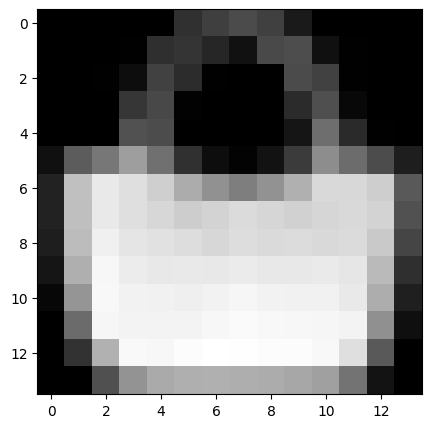

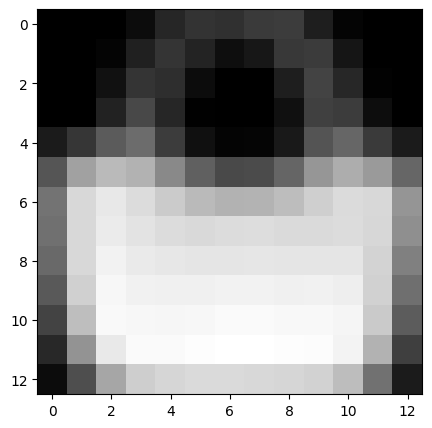

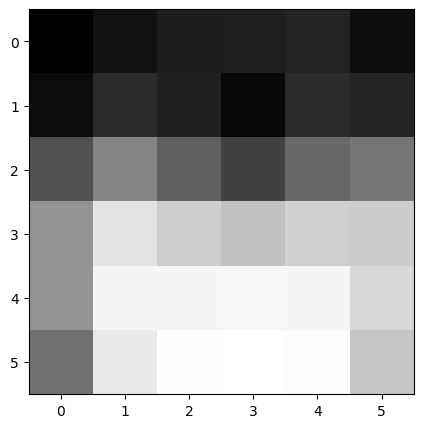

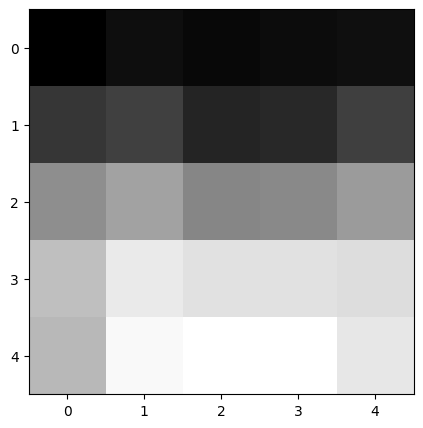

In [212]:
filter = np.array([[0,1,1,0],[1,1,1,1],[1,1,1,1],[0,1,1,0]])
#filter = np.array([[-1,1,1,-1],[0,1,1,0],[0,1,1,0],[-1,1,1,-1]])
Xmat = covlgrid(X1,4,2,1,filter)
Xmat = nonlinear(Xmat, "relu")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = poolgrid(Xmat,2,1,"average")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = covlgrid(Xmat,4,2,1,filter)
Xmat = nonlinear(Xmat, "relu")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")
Xmat = poolgrid(Xmat,2,1,"average")
plt.figure(figsize=(6, 5))
plt.imshow(Xmat[0], cmap="gray")

In [13]:
print(Xmat.shape)

(100, 5, 5)


In [213]:
def flatten(Amat, eps = 0.1):
  [n,m] = Amat.shape
  xvec = Amat.reshape(n*m,1)
  xmu = np.average(xvec)
  xsigma2 = np.sum((xvec - xmu).T @ (xvec - xmu))/xvec.shape[0]
  avec = (xvec - xmu)/np.sqrt(xsigma2 + eps)
  return avec

In [15]:
print(flatten(Xmat[0]))

[[-1.68867259]
 [-1.57304628]
 [-1.02092009]
 [-0.51117741]
 [-0.63446586]
 [-1.67881597]
 [-1.38499544]
 [-0.34959069]
 [ 0.60540505]
 [ 0.62001021]
 [-1.31111412]
 [-0.81354654]
 [ 0.25613324]
 [ 1.14545531]
 [ 1.25251442]
 [-0.26571636]
 [ 0.30342026]
 [ 0.84955188]
 [ 1.23160473]
 [ 1.28204091]
 [ 0.28074381]
 [ 0.79101962]
 [ 0.88653593]
 [ 0.88985867]
 [ 0.83776732]]


In [214]:
def fullcon(image, Wmat, bvec):
  [trainsize,n,m] = np.shape(image)
  #Ymat = np.zeros([10,trainsize])
  Amatnew = np.zeros([n*m, trainsize])
  Bmat = np.zeros([10,trainsize])
  for k in range(0,trainsize):
    Amat = image[k]
    avec = flatten(Amat)
    avec = avec.reshape(-1)
    Amatnew[:,k] = avec
    Bmat[:,k] = bvec.reshape(-1)
  Ymat = Wmat @ Amatnew + Bmat
  return Ymat

def softmax(Ymat):
  trainsize = Ymat.shape[1]
  Ymatnew = np.zeros(Ymat.shape)
  for k in range(0,trainsize):
    yveck = Ymat[:,k]
    yveck = yveck - np.max(yveck)
    for i in range(0,len(yveck)):
      Ymatnew[i,k] = np.exp(yveck[i])/np.sum(np.exp(yveck))
  return Ymatnew

In [215]:
def loss(image, trueval, Wmat, bvec):
  Ymat = fullcon(image, Wmat, bvec)
  trainsize = Ymat.shape[1]
  element = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
  error = 0
  Ymatsm = softmax(Ymat)
  actmat = np.zeros(Ymat.shape)
  for k in range(0,trainsize):
    #yveck = Ymatsm[:,k]
    #yveck = yveck.reshape([len(yveck),1])
    #print(yveck.shape)
    actveck = element == trueval[k]
    actveck = actveck.reshape(-1)
    actmat[:,k] = actveck
    #print(actveck)
  #print(actmat)
  error = np.sum((Ymatsm - actmat)**2)/2
  #error = error/trainsize
  #print(np.sum((Ymatsm-actmat)**2))
  return error, Ymat

In [216]:
Wmat = np.random.rand(10,Xmat.shape[1]*Xmat.shape[2])
#bvec = np.random.rand(10,Xmat.shape[0])
bvec = np.random.rand(10,1)
#print(Wmat)
#print(bvec)


In [217]:
Ymat = fullcon(Xmat, Wmat, bvec)
print(Ymat.shape)
Ymatsm = softmax(Ymat)
print(Ymatsm.shape)
error, Ymat = loss(Xmat, T1, Wmat, bvec)
print(error)
print(Ymat.shape)

(10, 100)
(10, 100)
53.31547033359903
(10, 100)


In [231]:
import random

def graddes(Wmat, bvec, image, randomsize, gamma = 0.1, maxiter = 5000):
  element = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
  trainsize = image.shape[0]
  [n,m] = Wmat.shape
  gdWmat = np.zeros(Wmat.shape)
  gdbvec = np.zeros(bvec.shape)
  randnum = random.sample(range(0,trainsize), randomsize)
  #print(randnum)
  imagerand = image[randnum]
  #print(imagerand)
  actvalrand = T1[randnum]
  #print(actvalrand)
  error, Ymat = loss(imagerand, actvalrand, Wmat, bvec)
  print("error",error)
  stp = 0
  #randnum = random.sample(range(0,trainsize), randomsize)
  while error > 1e-5:
    #randnum = random.sample(range(0,trainsize), randomsize)
    #imagerand = image[randnum]
    error, Ymat = loss(imagerand, actvalrand, Wmat, bvec)
    #actvalrand = train_y[randnum]
    Smat = softmax(Ymat)
    Amat = np.zeros([m,randomsize])
    Tmat = np.zeros(Ymat.shape)
    for k in range(0,randomsize):
      Xmat = imagerand[k]
      avec = flatten(Xmat)
      Amat[:,k] = avec.reshape(-1)
      actvalk = element == actvalrand[k]
      actveck = actvalk.reshape([10,1])
      Tmat[:,k] = actveck.reshape(-1)
      for i in range(0,n):
        gdbvec[i] = gdbvec[i] + ((Smat[i,k] - Tmat[i,k]) * np.exp(Ymat[i,k]) * (np.sum(np.exp(Ymat[:,k])) - np.exp(Ymat[i,k])) / (np.sum(np.exp(Ymat[:,k])))**2)
        for j in range(0,m):
          gdWmat[i,j] = gdWmat[i,j] + (Amat[j,k] * np.exp(Ymat[i,k]) * ((Smat[i,k] - Tmat[i,k]) * np.sum(np.exp(Ymat[:,k])) - (Smat[:,k] - Tmat[:,k]).T @ np.exp(Ymat[:,k])) / (np.sum(np.exp(Ymat[:,k])))**2)
    #print(gdWmat)
    #print(gdbvec)
    print(Tmat)
    Wmat = Wmat - gamma*gdWmat
    bvec = bvec - gamma*gdbvec
    #print(Wmat)
    #print(bvec)
    error, Ymat = loss(imagerand, actvalrand, Wmat, bvec)
    print(error)
    Ymatsm = softmax(Ymat)
    print("softmax",Ymatsm)
    stp = stp + 1
    if stp >= maxiter:
      break
  return error, Wmat, bvec

In [235]:
err, W, b = graddes(Wmat, bvec, Xmat, 5, 0.1, 100)

error 3.1141674212676405
[[1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
2.764861047174498
softmax [[0.02672567 0.01302358 0.03213477 0.01892428 0.01664015]
 [0.36871368 0.32345016 0.16945177 0.33374373 0.49484055]
 [0.05388285 0.06280549 0.05955221 0.06480483 0.01146427]
 [0.2184105  0.20176336 0.2312687  0.16086966 0.20102972]
 [0.01826765 0.02026398 0.01847118 0.03785686 0.08810777]
 [0.00372274 0.00543992 0.00712883 0.00398868 0.0061564 ]
 [0.00491191 0.00630564 0.00294391 0.00333501 0.02227076]
 [0.03185157 0.02985493 0.01845048 0.0629127  0.00879719]
 [0.26722292 0.33287312 0.44820256 0.3007881  0.147157  ]
 [0.00629051 0.00421981 0.0123956  0.01277616 0.00353617]]
[[1. 1. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]
2.7483

In [ ]:
def fcback(yvec, Wmat, bvec):
  n = Wmat.shape[1]
  avec = np.linalg.inv(Wmat.T @ Wmat) @ Wmat.T @ (yvec - bvec)
  Xmat = avec.reshape(int(np.sqrt(n)),int(np.sqrt(n)))
  return Xmat

[[ 0.93465505  3.6394369  -0.13706219  2.14082328 -3.08373046]
 [-2.25322748 -2.35355907  0.97660049  3.56002201  0.15747722]
 [-1.48197038  1.95968791  2.91758517  0.0729078  -0.31136833]
 [-3.32184146  2.04539976 -0.05760861 -0.73828896  0.31768617]
 [ 0.9761485  -1.48181381 -1.19519728  0.1484975  -0.60002091]]


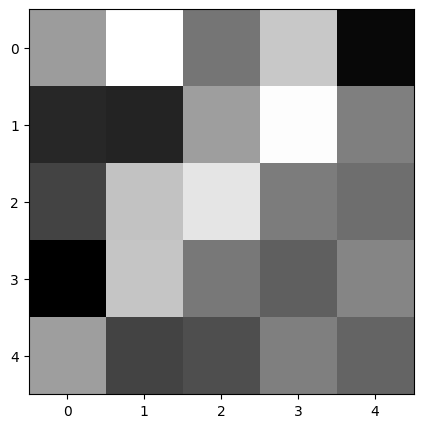

In [ ]:
Tmat = fcback(Ymat, Wmat, bvec)
print(Tmat)
plt.figure(figsize=(6, 5))
plt.imshow(Tmat, cmap="gray")

In [44]:
import random

def graddes(filter, Wmat, bvec, image, randomsize, gamma = 0.1, maxiter = 5000):
  element = np.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])
  trainsize = image.shape[0]
  [n,m] = Wmat.shape
  gdWmat = np.zeros(Wmat.shape)
  gdbvec = np.zeros(bvec.shape)
  #randnum = random.sample(range(0,trainsize), randomsize)
  #imagerand = image[randnum]
  error, Ymat = loss(image, Wmat, bvec)
  #print("error",error)
  stp = 0
  while error > 0.01:
    randnum = random.sample(range(0,trainsize), randomsize)
    imagerand = image[randnum]
    error, Ymat = loss(imagerand, Wmat, bvec)
    actvalrand = train_y[randnum]
    for k in range(0,randomsize):
      Amat = imagerand[k]
      avec = flatten(Amat)
      yvect = Wmat @ avec + bvec
      yvect = yvect - np.max(yvect)
      yvectsm = softmax(yvect)
      #print("softval",yvectsm)
      actvalk = element == actvalrand[k]
      actveck = actvalk.reshape([10,1])
      #print("actvalue",actveck)
      for i in range(0,n):
        gdbvec[i] = (np.sum(np.exp(yvect)) - np.exp(yvect[i])) * np.exp(yvect[i]) * (yvectsm[i]-actveck[i]) / (np.sum(np.exp(yvect)))**2
        #print((np.sum(np.exp(yvect)))**2)
        for j in range(0,m):
          gdWmat[i,j] = avec[j] * np.exp(yvect[i]) * ((np.sum(np.exp(yvect))) * (yvectsm[i]-actveck[i]) - (yvectsm-actveck).T @ np.exp(yvect)) / (np.sum(np.exp(yvect)))**2
      #print("yvec",yvect)
      #print("gdW",gdWmat)
      #print("gdb",gdbvec)
      Wmat = Wmat - gamma*gdWmat
      bvec = bvec - gamma*gdbvec
      #print(Wmat)
      #print(bvec)
      error, Ymat = loss(imagerand, Wmat, bvec)
    #print(yvec)
    #print(softmax(yvec))
    print(error)
    stp = stp + 1
    if stp >= maxiter:
      break
  return error, Wmat, bvec